In [134]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('notebook', font_scale=1.3)
sns.set_style('white')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [135]:
df = pd.read_csv('cross.csv')
# df.σ_obs = (1 + df.σ_obs * 9)
params = [col for col in df.columns if col != 'loss']
mle = pd.Series({col: df[col].value_counts().idxmax() for col in params})

In [136]:
mle_mask = df.drop('loss', axis=1) == mle
assert (mle_mask.sum(axis=1) >= 3).all()

In [143]:
def plot_param(param, scatter=False, ax=None, **kws):
    mask = mle_mask.drop(param, axis=1).all(axis=1)
    d = df.loc[mask]
    if scatter:
        plt.scatter(d[param], d.loss, s=5, c='k', alpha=0.3)
    return sns.lineplot(param, 'loss', data=d, ax=ax, **kws)

Text(0, 0.5, 'Loss')

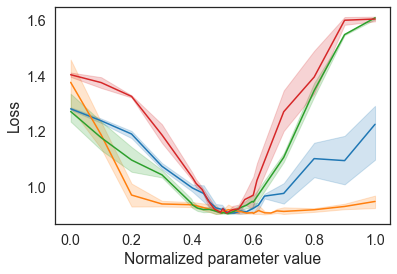

In [142]:
ax = plt.gca()
for prm in params:
    plot_param(prm, ax=ax)
    
plt.xlabel('Normalized parameter value')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

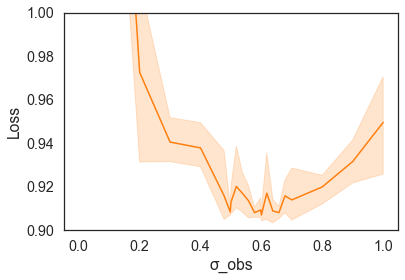

In [145]:
plot_param('σ_obs', c='C1')
plt.ylim(0.9, 1.0)
plt.ylabel('Loss')

TypeError: plot_param() got an unexpected keyword argument 'ax'

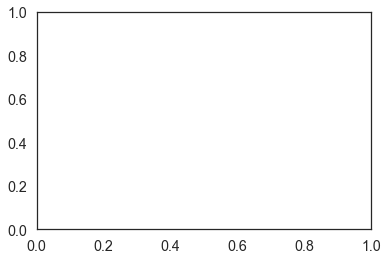

In [98]:
ax = plt.gca()
plot_param('σ_obs', ax=ax)
# plot_param('α', )

In [29]:
results= 'results/2019-06-15T13-34-26'
X = pd.read_json(f'{results}/cross.json').T
# X.columns = ['obs_sigma', 'sample_cost', 'switch_cost', 'μ']
# X.columns = ['α', 'obs_sigma', 'sample_cost', 'switch_cost', 'µ', 'σ']
X.columns = ['α', 'obs_sigma', 'sample_cost', 'switch_cost']
X.index = np.arange(-.1, .11, 0.02)

(0.07363290649193001, 0.08397697191453513)

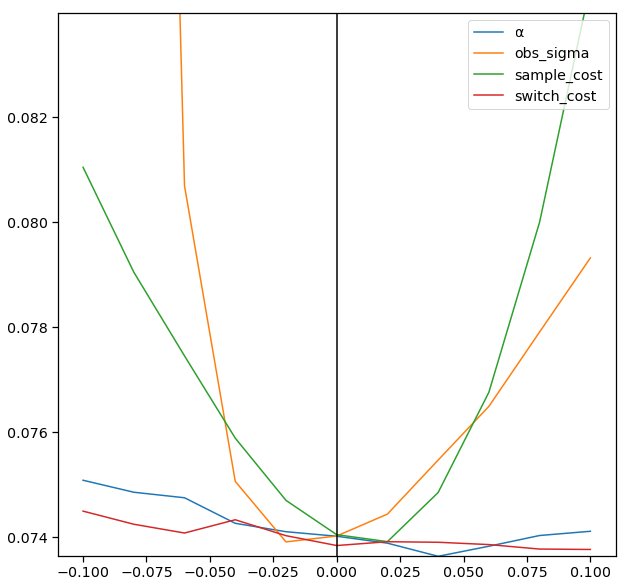

In [40]:
X.plot(figsize=(10,10))
plt.axvline(0, c='k')
plt.ylim(*X.stack().quantile([0, 0.95]))